In [28]:
import pandas as pd
import numpy as np

In [43]:
dt = pd.read_excel('Metadata_and_relative_abundance_of_seminal_microbiota_from_idiopathic_infertile_patients_and_donors.xlsx', sheet_name='Family-level microbiota')
print(dt.head())

   Sample ID  Peptoniphilaceae  Campylobacteraceae  Streptococcaceae  \
0  UAB 17001           46.4265              0.6828            0.0650   
1  UAB 17002            1.6004              0.0081            0.0866   
2  UAB 17003           41.8100              6.9997            5.5466   
3  UAB 17004           19.7614              0.2237            0.8203   
4  UAB 17005           49.7581              1.8944           10.5872   

   Moraxellaceae  Staphylococcaceae  Prevotellaceae  Corynebacteriaceae  \
0         6.7373             1.8859          1.6713              5.1440   
1         0.3201             1.4494          0.0000              0.5536   
2         0.1772             0.4794         20.7520              1.4129   
3         0.8203             6.4131          0.9694              6.7860   
4         0.7384             8.2395          0.0611              7.7558   

   Peptostreptococcaceae  Lactobacillaceae  ...  Sphaerobacteraceae  \
0                 0.3967            0.0650  .

In [44]:
# Add a new column that is equals to 1 if the Sample ID starts with U and 0 otherwise
dt['Infertile'] = dt['Sample ID'].str.startswith('U').astype(int)
# Randomize the order of the rows
dt = dt.sample(frac=1).reset_index(drop=True)

In [45]:
dt.describe()

,Peptoniphilaceae,Campylobacteraceae,Streptococcaceae,Moraxellaceae,Staphylococcaceae,Prevotellaceae,Corynebacteriaceae,Peptostreptococcaceae,Lactobacillaceae,Veillonellaceae,...,Limnochordaceae,Chthonomonadaceae,Egicoccaceae,Jiangellaceae,Orbaceae,Bernardetiaceae,Succinivibrionaceae,Sporolactobacillaceae,Gemmataceae,Infertile
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,32.102036,5.812498,4.799541,4.121246,3.825898,3.787212,3.272387,2.894602,2.608712,2.608511,...,0.000054,0.000046,0.000046,0.000045,0.000045,0.000041,0.000039,0.000039,0.000037,0.750000
std,20.070654,9.180485,6.936334,8.879530,6.779456,6.199744,4.501437,4.726574,9.324191,3.034740,...,0.000222,0.000174,0.000180,0.000170,0.000256,0.000203,0.000245,0.000201,0.000243,0.436931
min,0.011100,0.000000,0.000000,0.000000,0.000000,0.000000,0.021200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.110100,0.011850,0.056625,0.014925,0.183025,0.087500,0.193575,0.025350,0.034425,0.108375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,32.372600,0.868900,0.853650,0.287500,1.159250,0.898800,1.023000,0.571550,0.140850,0.919500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.391150,7.789350,5.876700,3.467100,4.204325,3.265300,5.268325,4.565900,0.674850,5.112225,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,66.937300,36.337200,24.560700,42.279100,30.683200,21.057400,19.638600,21.208600,63.739100,12.531100,...,0.001400,0.000800,0.001000,0.000800,0.001800,0.001400,0.001800,0.001400,0.001800,1.000000


In [46]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets.
x = dt.iloc[:,1:]
y = dt['Infertile']
random_state = 56
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
n_classes = len(np.unique(y))


Text(0, 0.5, 'Cumulative Explained Variance')

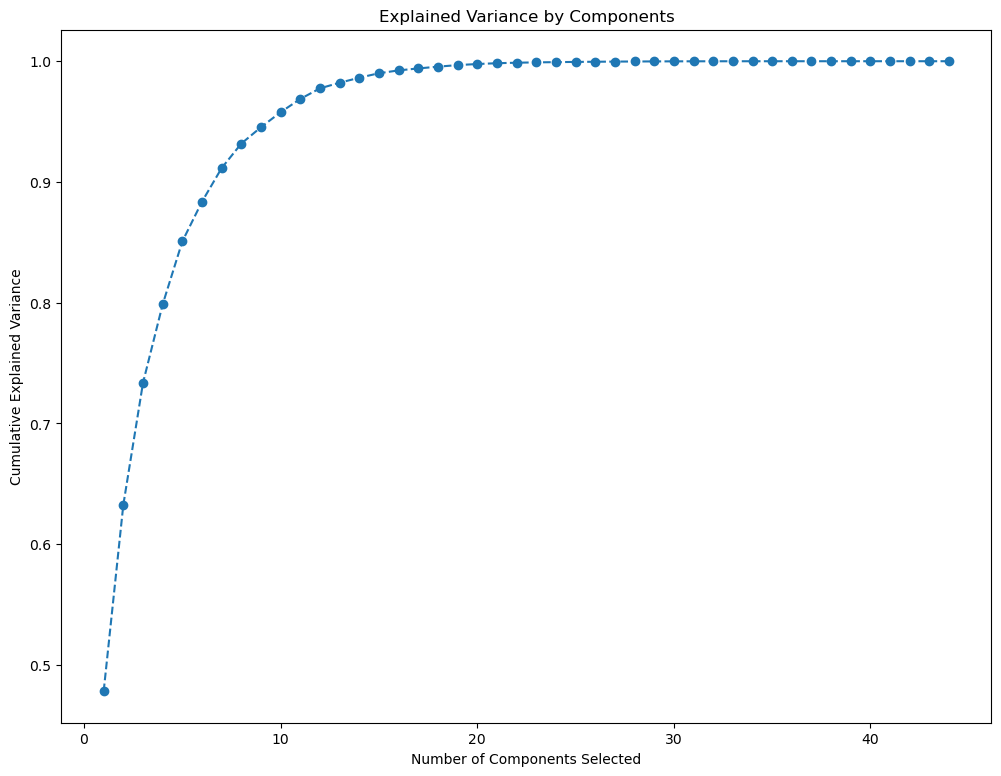

In [47]:
# Use PCA to reduce dimension of the problem.
pca = PCA()
pca.fit(x_train, y_train)

# Plot the cumulative variance explained by total number of components selected.
# We want to keep around 80% of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,45), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "--")
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components Selected')
plt.ylabel('Cumulative Explained Variance')

In [48]:
# The plot shows that 8 components already explain 90% of the variance of the data.
reduced_components = 8

# Reduce dimensions with PCA.
pca = make_pipeline(StandardScaler(), PCA(n_components=reduced_components, random_state=random_state))

# Reduce dimensions with NeighborhoodComponentAnalysis.
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=reduced_components, random_state=random_state),
)

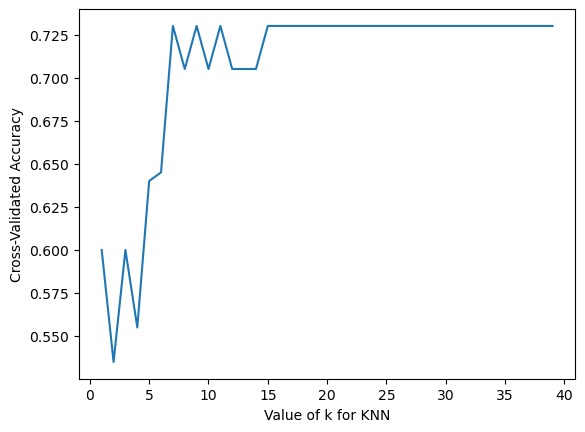

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Use cross-validation to find the best value of k.
k_range = range(1, 40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [41]:
# The plot shows that from 16 neighbours on we get a constant value.
heur_neighbors = 16

# Use a nearest neighbor classifier to evaluate the methods.
knn = KNeighborsClassifier(n_neighbors=heur_neighbors)

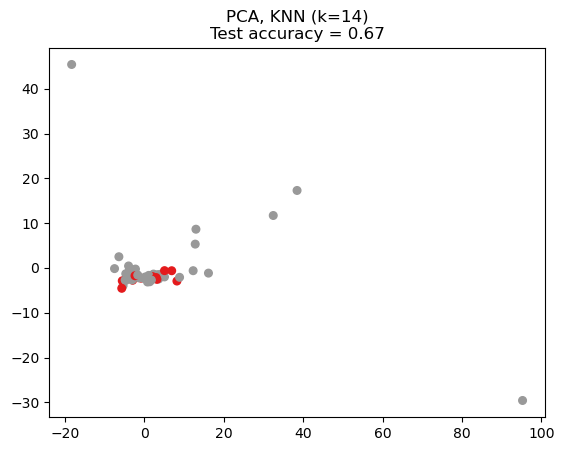

In [42]:
# Generate PCA solution
plt.figure()

# Fit the method's model
pca.fit(x_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(x_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(x_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
x_embedded = pca.transform(x)

# Plot the projected points and show the evaluation score
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, s=30, cmap="Set1")
plt.title(
    "PCA, KNN (k={})\nTest accuracy = {:.2f}".format(heur_neighbors, acc_knn)
    )
plt.show()

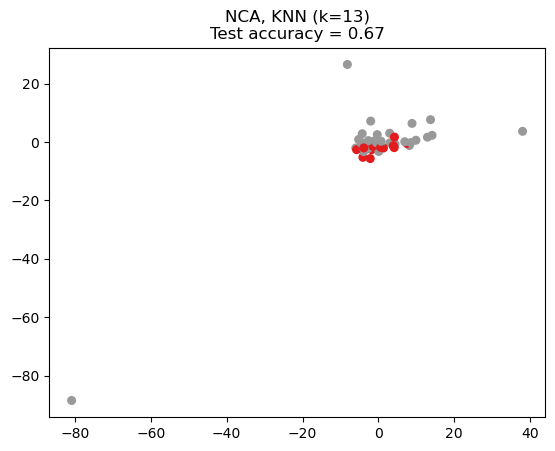

In [27]:
# Generate NCA solution
plt.figure()

# Fit the method's model
nca.fit(x_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(nca.transform(x_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(nca.transform(x_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
x_embedded = nca.transform(x)

# Plot the projected points and show the evaluation score
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, s=30, cmap="Set1")
plt.title(
    "NCA, KNN (k={})\nTest accuracy = {:.2f}".format(heur_neighbors, acc_knn)
    )
plt.show()